In [1]:
import os
os.chdir(f'./StyleCLIP')

from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage

In [5]:
experiment_type = 'free_generation' #@param ['edit', 'free_generation']

description = 'wolf' #@param {type:"string"}

latent_path = None #@param {type:"string"}

optimization_steps = 80#@param {type:"number"}

l2_lambda = 1e-5 #@param {type:"number"}

id_lambda = 1e-3 #@param {type:"number"}

stylespace = True #@param {type:"boolean"}

create_video = True #@param {type:"boolean"}

In [6]:
use_seed = True #@param {type:"boolean"}

seed = 1#@param {type: "number"}

In [7]:
##### @title Additional Arguments
args = {
    "description": description,
    #"ckpt": "/data/scratch/ngop/StyleWav/StyleCLIP/stylegan2-ffhq-config-f.pt",
    "ckpt": "/data/scratch/ngop/StyleWav/StyleCLIP/stylegan2-afhqwild-512x512.pt",
    #"ckpt": "/data/scratch/ngop/StyleWav/StyleCLIP/stylegan2-afhqv2-512x512.pt",
    "stylegan_size": 512, #1024
    "lr_rampup": 0.05,
    "lr": 0.1,
    "step": optimization_steps,
    "mode": experiment_type,
    "l2_lambda": l2_lambda,
    "id_lambda": id_lambda,
    'work_in_stylespace': stylespace,
    "latent_path": latent_path,
    "truncation": 0.7,
    "save_intermediate_image_every": 1 if create_video else 20,
    "results_dir": "results",
    "ir_se50_weights": "/data/scratch/ngop/StyleWav/StyleCLIP/model_ir_se50.pth",
    "audio":None,#"/data/scratch/ngop/StyleWav/asset/AudioCLIPSound/cat.wav",
    "aclip_loss": False
}
#"/data/scratch/ngop/StyleWav/welcome-to-the-internet.wav"
#"/data/scratch/ngop/StyleWav/asset/audio/172738__alucardsbride__crying-woman.wav"

In [8]:
if use_seed:
  import torch
  torch.manual_seed(seed)
from optimization.run_optimization import main

from argparse import Namespace
result = main(Namespace(**args))

result_image = ToPILImage()(make_grid(result.detach().cpu(), normalize=True, scale_each=True, range=(-1, 1), padding=0))
h, w = result_image.size
result_image.resize((h // 2, w // 2))

Loading ResNet ArcFace


  0%|                                                    | 0/80 [00:00<?, ?it/s]/data/scratch/ngop/.envs/audio-clip/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


RuntimeError: CUDA out of memory. Tried to allocate 148.00 MiB (GPU 0; 10.76 GiB total capacity; 2.19 GiB already allocated; 118.38 MiB free; 2.23 GiB reserved in total by PyTorch)

In [11]:
!ffmpeg -r 15 -i results/%05d.jpg -c:v libx264 -vf fps=25 -pix_fmt yuv420p out.mp4 -y

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

Loading ResNet ArcFace


loss: 0.5454;: 100%|████████████████████████████| 50/50 [00:13<00:00,  3.84it/s]


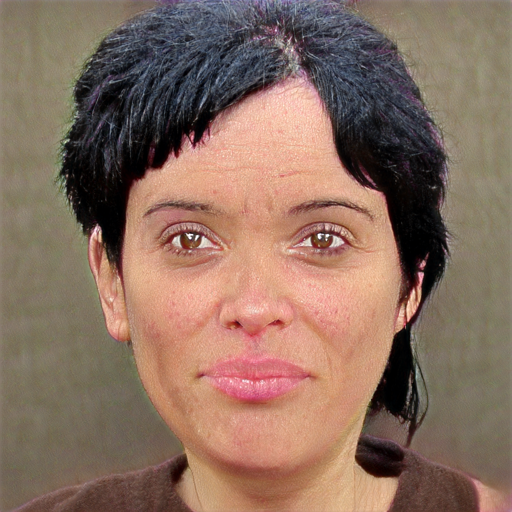

In [6]:
args["aclip_loss"] = True

if use_seed:
  import torch
  torch.manual_seed(seed)
from optimization.run_optimization import main

from argparse import Namespace
result = main(Namespace(**args))

result_image = ToPILImage()(make_grid(result.detach().cpu(), normalize=True, scale_each=True, range=(-1, 1), padding=0))
h, w = result_image.size
result_image.resize((h // 2, w // 2))

# Gen from Folder

In [61]:
from tqdm import tqdm

In [84]:
folder_dir = "../asset/audio/people_sobbing/5s/"
laughing = os.listdir(folder_dir)

In [85]:
laughing.sort()

In [87]:
for path in tqdm(laughing):
    args["audio"] = folder_dir + path
    if use_seed:
        torch.manual_seed(seed)
    result = main(Namespace(**args))
    image_path = "../asset/img/people_sobbing/" + path.split('.')[0] + '.jpg'
    ! mv results/00009.jpg $image_path




  0%|                                                                                                                                                 | 0/29 [00:00<?, ?it/s]

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9775;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9775;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:05,  1.70it/s]



loss: 0.9775;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:05,  1.70it/s]



loss: 0.9775;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:04,  1.69it/s]



loss: 0.9336;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9829;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9829;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:05,  1.58it/s]



loss: 0.9829;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:05,  1.58it/s]



loss: 0.9829;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:05,  1.59it/s]



loss: 0.9424;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 1.0342;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 1.0342;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:05,  1.76it/s]



loss: 1.0342;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:05,  1.76it/s]



loss: 1.0342;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:04,  1.66it/s]



loss: 1.0000;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9165;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9165;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:05,  1.52it/s]



loss: 0.9165;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:05,  1.52it/s]



loss: 0.9165;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:05,  1.46it/s]



loss: 0.8745;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9517;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9517;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:07,  1.24it/s]



loss: 0.9517;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:07,  1.24it/s]



loss: 0.9517;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:05,  1.37it/s]



loss: 0.9170;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9844;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9844;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:07,  1.28it/s]



loss: 0.9844;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:07,  1.28it/s]



loss: 0.9844;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:06,  1.28it/s]



loss: 0.9487;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9111;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9111;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:04,  1.81it/s]



loss: 0.9111;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:04,  1.81it/s]



loss: 0.9111;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:04,  1.76it/s]



loss: 0.8789;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9541;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9541;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:05,  1.62it/s]



loss: 0.9541;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:05,  1.62it/s]



loss: 0.9541;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:04,  1.62it/s]



loss: 0.9102;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9370;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9370;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:05,  1.79it/s]



loss: 0.9370;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:05,  1.79it/s]



loss: 0.9370;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:04,  1.68it/s]



loss: 0.8994;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 1.0215;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 1.0215;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:06,  1.37it/s]



loss: 1.0215;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:06,  1.37it/s]



loss: 1.0215;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:05,  1.48it/s]



loss: 0.9785;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.8833;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.8833;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:05,  1.53it/s]



loss: 0.8833;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:05,  1.53it/s]



loss: 0.8833;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:05,  1.58it/s]



loss: 0.8569;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9473;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9473;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:05,  1.73it/s]



loss: 0.9473;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:05,  1.73it/s]



loss: 0.9473;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:04,  1.67it/s]



loss: 0.9097;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9609;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9609;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:05,  1.73it/s]



loss: 0.9609;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:05,  1.73it/s]



loss: 0.9609;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:04,  1.70it/s]



loss: 0.9282;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9438;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9438;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:06,  1.37it/s]



loss: 0.9438;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:06,  1.37it/s]



loss: 0.9438;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:05,  1.34it/s]



loss: 0.9102;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 1.0254;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 1.0254;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:05,  1.53it/s]



loss: 1.0254;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:05,  1.53it/s]



loss: 1.0254;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:05,  1.53it/s]



loss: 0.9995;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9512;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9512;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:06,  1.46it/s]



loss: 0.9512;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:06,  1.46it/s]



loss: 0.9512;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:05,  1.43it/s]



loss: 0.9277;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9331;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9331;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:05,  1.73it/s]



loss: 0.9331;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:05,  1.73it/s]



loss: 0.9331;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:04,  1.68it/s]



loss: 0.9019;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9155;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9155;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:05,  1.73it/s]



loss: 0.9160;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:05,  1.73it/s]



loss: 0.9160;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:04,  1.67it/s]



loss: 0.8828;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9785;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9785;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:06,  1.33it/s]



loss: 0.9785;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:06,  1.33it/s]



loss: 0.9785;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:06,  1.32it/s]



loss: 0.9399;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9438;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9438;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:05,  1.54it/s]



loss: 0.9438;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:05,  1.54it/s]



loss: 0.9438;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:05,  1.53it/s]



loss: 0.9087;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9336;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9336;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:05,  1.62it/s]



loss: 0.9336;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:05,  1.62it/s]



loss: 0.9336;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:04,  1.60it/s]



loss: 0.8965;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9731;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9731;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:06,  1.39it/s]



loss: 0.9731;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:06,  1.39it/s]



loss: 0.9731;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:05,  1.43it/s]



loss: 0.9224;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9678;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9678;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:05,  1.64it/s]



loss: 0.9678;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:05,  1.64it/s]



loss: 0.9678;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:05,  1.60it/s]



loss: 0.9302;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9448;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9448;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:05,  1.58it/s]



loss: 0.9448;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:05,  1.58it/s]



loss: 0.9448;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:04,  1.63it/s]



loss: 0.9194;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9395;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9395;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:06,  1.42it/s]



loss: 0.9395;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:06,  1.42it/s]



loss: 0.9395;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:05,  1.40it/s]



loss: 0.9014;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9448;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9448;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:05,  1.62it/s]



loss: 0.9448;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:05,  1.62it/s]



loss: 0.9448;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:05,  1.59it/s]



loss: 0.9092;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 1.0479;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 1.0479;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:05,  1.67it/s]



loss: 1.0479;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:05,  1.67it/s]



loss: 1.0479;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:04,  1.70it/s]



loss: 1.0078;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9609;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9609;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:06,  1.42it/s]



loss: 0.9609;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:06,  1.42it/s]



loss: 0.9609;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:05,  1.40it/s]



loss: 0.9277;:  20%|████████████████████████▍                                                                  

Loading ResNet ArcFace






  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]



loss: 0.9531;:   0%|                                                                                                                                  | 0/10 [00:00<?, ?it/s]



loss: 0.9531;:  10%|████████████▏                                                                                                             | 1/10 [00:00<00:06,  1.40it/s]



loss: 0.9531;:  10%|████████████▏                                                                                                             | 1/10 [00:01<00:06,  1.40it/s]



loss: 0.9531;:  20%|████████████████████████▍                                                                                                 | 2/10 [00:01<00:05,  1.38it/s]



loss: 0.9204;:  20%|████████████████████████▍                                                                  